# K-Means Clustering from Scratch

This notebook implements the K-Means clustering algorithm without using sklearn's KMeans class. The implementation demonstrates the core logic of the algorithm using NumPy for calculations.

**Objective**: Partition data into K clusters by iteratively assigning points to nearest centroids and updating centroid positions.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import seaborn as sns

# Setting style for better visualizations
sns.set_style("whitegrid")
np.random.seed(42)

## Data Generation

Generating synthetic clustered data using make_blobs to demonstrate the K-Means algorithm. The data will have clear cluster structures for easy visualization.

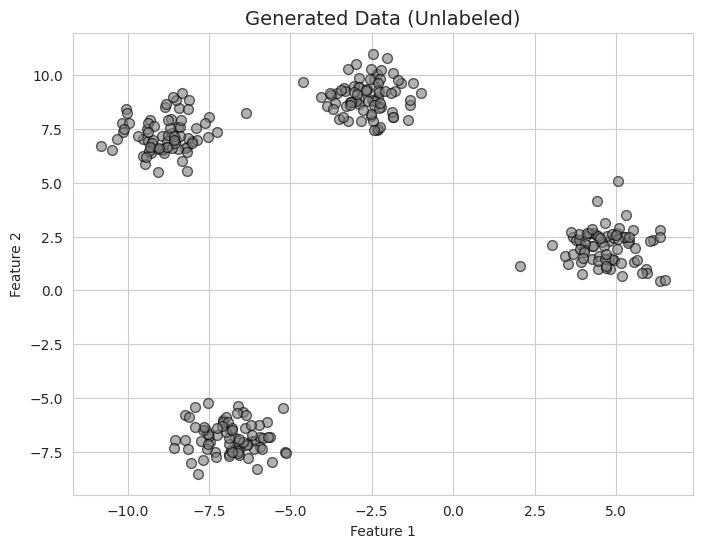

Data shape: (300, 2)
Number of samples: 300, Number of features: 2


In [2]:
# Generating synthetic data with 4 distinct clusters
X, true_labels = make_blobs(n_samples=300, centers=4, n_features=2,
                             cluster_std=0.8, random_state=42)

# Visualizing the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.6, edgecolors='k', s=50)
plt.title('Generated Data (Unlabeled)', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f"Data shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}, Number of features: {X.shape[1]}")

## K-Means Implementation from Scratch

Implementing the core K-Means algorithm with the following functions:
- **euclidean_distance**: Calculates distance between points and centroids
- **initialize_centroids**: Randomly selects K data points as initial centroids
- **assign_clusters**: Assigns each point to the nearest centroid
- **update_centroids**: Recalculates centroid positions as cluster means
- **kmeans_from_scratch**: Main function orchestrating the algorithm

In [3]:
def euclidean_distance(X, centroids):
    """Calculate Euclidean distance between each point and each centroid."""
    # Using broadcasting to compute distances efficiently
    distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return distances

def initialize_centroids(X, k):
    """Randomly select k data points as initial centroids."""
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]
    return centroids

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid."""
    distances = euclidean_distance(X, centroids)
    labels = np.argmin(distances, axis=1)  # Index of closest centroid
    return labels

def update_centroids(X, labels, k):
    """Calculate new centroids as the mean of points in each cluster."""
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans_from_scratch(X, k, max_iters=100, tol=1e-4):
    """Main K-Means algorithm."""
    # Initializing centroids
    centroids = initialize_centroids(X, k)

    for iteration in range(max_iters):
        # Assignment step
        labels = assign_clusters(X, centroids)

        # Update step
        new_centroids = update_centroids(X, labels, k)

        # Checking convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            print(f"Converged at iteration {iteration + 1}")
            break

        centroids = new_centroids

    # Calculating inertia (WCSS)
    distances = euclidean_distance(X, centroids)
    inertia = np.sum(np.min(distances, axis=1) ** 2)

    return labels, centroids, inertia

print("K-Means functions defined successfully!")

K-Means functions defined successfully!


## Running K-Means and Evaluating Results

Applying the from-scratch K-Means implementation on the generated data and evaluating clustering quality using Silhouette Score and Inertia.

In [10]:
# Running K-Means multiple times to find best solution
best_inertia = float('inf')
best_labels = None
best_centroids = None

n_runs = 10
print(f"Running K-Means {n_runs} times to find best initialization...")

for run in range(n_runs):
    labels_temp, centroids_temp, inertia_temp = kmeans_from_scratch(X, k, max_iters=100)

    if inertia_temp < best_inertia:
        best_inertia = inertia_temp
        best_labels = labels_temp
        best_centroids = centroids_temp
        print(f"  Run {run+1}: New best inertia = {inertia_temp:.2f}")

# Using best results
labels = best_labels
centroids = best_centroids
inertia = best_inertia

print(f"\nBest result selected with inertia: {inertia:.2f}")

Running K-Means 10 times to find best initialization...
Converged at iteration 6
  Run 1: New best inertia = 1886.16
Converged at iteration 4
  Run 2: New best inertia = 362.47
Converged at iteration 3
Converged at iteration 3
Converged at iteration 5
Converged at iteration 4
Converged at iteration 4
Converged at iteration 2
Converged at iteration 6
Converged at iteration 5

Best result selected with inertia: 362.47


In [11]:
# Running K-Means with k=4 clusters
k = 4
labels, centroids, inertia = kmeans_from_scratch(X, k)

# Calculating Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print(f"\n{'='*50}")
print(f"K-Means Clustering Results (k={k})")
print(f"{'='*50}")
print(f"Inertia (WCSS): {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Centroid positions:\n{centroids}")

Converged at iteration 3

K-Means Clustering Results (k=4)
Inertia (WCSS): 362.47
Silhouette Score: 0.834
Centroid positions:
[[ 4.70253968  2.02807134]
 [-2.63715917  8.98563949]
 [-8.83330596  7.21790214]
 [-6.84180708 -6.84038791]]


## Visualization

Visualizing the final clustering results with color-coded clusters and marked centroids.

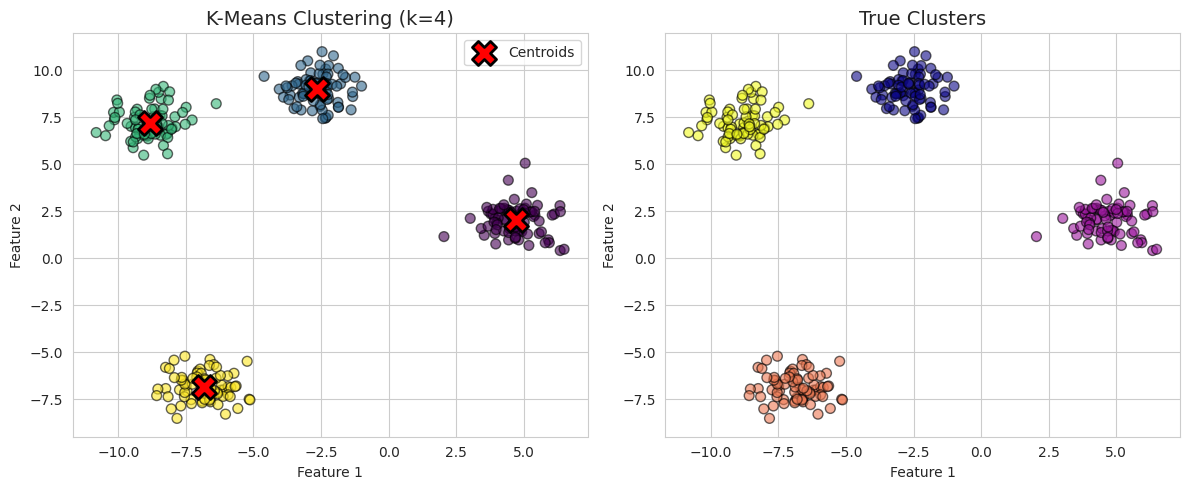

In [12]:
# Visualizing the clustering results
plt.figure(figsize=(12, 5))

# Subplot 1: Clustered data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
            alpha=0.6, edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X',
            s=300, edgecolors='black', linewidths=2, label='Centroids')
plt.title(f'K-Means Clustering (k={k})', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Subplot 2: True labels (for comparison)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='plasma',
            alpha=0.6, edgecolors='k', s=50)
plt.title('True Clusters', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()